Trabalho 2

Bibliotecas

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Parâmetros do problema

In [9]:
D = 1.0  # Coeficiente de difusão
ka = 1.0  # Parâmetro ka
kb = 1.5  # Parâmetro kb
L = 1.0  # Comprimento L
Lf = 1.0  # Comprimento Lf
CE = 1.0  # Concentração na fronteira x=0
N = 100  # Número de pontos de grade

Discretização do domínio

In [10]:
dx = (L + Lf) / (N - 1)
x = np.linspace(0, L + Lf, N)

Matriz de coeficientes e vetor de termos constantes

In [11]:
A = np.zeros((N, N))
b = np.zeros(N)

# Preenchimento da matriz A e do vetor b
for i in range(1, N-1):
    if x[i] < L:
        A[i, i-1] = D / dx**2
        A[i, i] = -2 * D / dx**2 - ka
        A[i, i+1] = D / dx**2
    else:
        A[i, i-1] = D / dx**2
        A[i, i] = -2 * D / dx**2 - kb
        A[i, i+1] = D / dx**2

A

array([[    0.  ,     0.  ,     0.  , ...,     0.  ,     0.  ,     0.  ],
       [ 2450.25, -4901.5 ,  2450.25, ...,     0.  ,     0.  ,     0.  ],
       [    0.  ,  2450.25, -4901.5 , ...,     0.  ,     0.  ,     0.  ],
       ...,
       [    0.  ,     0.  ,     0.  , ..., -4902.  ,  2450.25,     0.  ],
       [    0.  ,     0.  ,     0.  , ...,  2450.25, -4902.  ,  2450.25],
       [    0.  ,     0.  ,     0.  , ...,     0.  ,     0.  ,     0.  ]])

Condições de contorno

In [12]:
A[0, 0] = 1.0
b[0] = CE
A[-1, -2] = -1.0 / dx
A[-1, -1] = 1.0 / dx

Resolução do sistema linear

In [13]:
C = np.linalg.solve(A, b)

C

array([1.        , 0.97993191, 0.96026375, 0.94098749, 0.92209527,
       0.90357938, 0.88543226, 0.8676465 , 0.85021485, 0.83313019,
       0.81638554, 0.79997408, 0.78388911, 0.76812406, 0.7526725 ,
       0.73752812, 0.72268474, 0.70813631, 0.69387688, 0.67990064,
       0.66620187, 0.652775  , 0.63961455, 0.62671513, 0.61407149,
       0.60167846, 0.58953099, 0.57762413, 0.565953  , 0.55451285,
       0.54329901, 0.5323069 , 0.52153204, 0.51097003, 0.50061655,
       0.49046739, 0.48051839, 0.47076551, 0.46120476, 0.45183223,
       0.44264411, 0.43363664, 0.42480614, 0.41614902, 0.40766174,
       0.39934083, 0.3911829 , 0.38318463, 0.37534274, 0.36765403,
       0.36011537, 0.35279717, 0.34569495, 0.33880435, 0.33212116,
       0.32564129, 0.31936078, 0.31327577, 0.30738254, 0.30167749,
       0.29615712, 0.29081805, 0.28565701, 0.28067085, 0.27585651,
       0.27121105, 0.26673161, 0.26241547, 0.25825997, 0.25426257,
       0.25042083, 0.24673239, 0.24319499, 0.23980648, 0.23656

Plota a solução

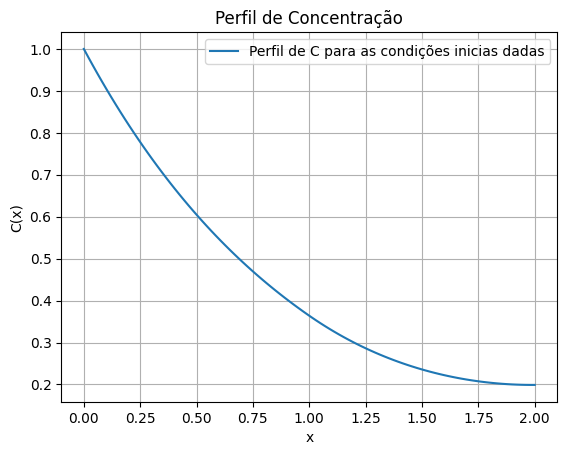

In [14]:
plt.plot(x, C, label=f'Perfil de C para as condições inicias dadas')
plt.xlabel('x')
plt.ylabel('C(x)')
plt.title('Perfil de Concentração')
plt.grid()
plt.legend()
plt.show()